# <font color='blue'><u>Estudo de Caso</u></font>

## <font color='blue'>Engenharia de Atributos Para E-Commerce Analytics</font>

#### Obs: Estaremos utilizando a mesma base de dados para trabalhar em um grande projeto de Ciência de Dados distribuído em 3 capítulos:

- Capítulo 4 (Análise Exploratória de Dados) 
- Capítulo 5 (Engenharia de Atributos)     -> <strong>Atual</strong>
- Capítulo 6 (Pré-Processamento de Dados)

## Contexto (Cap. 5)

#### Este Estudo de Caso é uma continuação do trabalho iniciado no capítulo anterior. Agora aplicaremos Engenharia de Atributos.

#### O objetivo é analisar os dados por diferentes perspectivas e criar novas variáveis que ajudem a compreender o comportamento da variável alvo, em nosso caso se um produto será enviado com atraso ou não.

#### Todo  o  Estudo  de  Caso  é  no  contexto  de  um  problema  de  negócio  em  E-Commerce Analytics.<br><br><br>

## Definição do Problema

Uma empresa internacional de comércio eletrônico (E-commerce) que vende produtos eletrônicos deseja descobrir informações importantes de seu banco de dados de clientes.

Os produtos ficam armazenados em um armazém na sede da empresa. Após concluir a compra no web site da empresa, o cliente recebe o produto em casa, em qualquer parte do mundo.  Os  produtos  são  enviados  de  Navio,  Avião  ou  Caminhão,  dependendo  da  região  de entrega.

Em cada compra o cliente pode receber um desconto dependendo do peso do produto comprado. Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou problemas e após receber o produto o cliente pode deixar uma avaliação sobre a experiência de compra. O único dado pessoal sobre o cliente que está disponível é o gênero.

Nosso trabalho neste <u>Estudo de Caso</u> é explorar os dados, compreender como estão organizados, detectar eventuais problemas e analisar os dados por diferentes perspectivas.

Trabalharemos com dados fictícios que representam dados reais de uma empresa de E-Commerce. Os dados estão disponíveis na pasta "dados". <br><br><br>

## Dicionário de Dados<br><br>

<table border="2">
  <tr>
    <th>Nome da Coluna</th>
    <th>Tipo de Dado</th>
    <th>Descrição</th>
  </tr>
  <tr>
    <td>ID</td>
    <td>Int</td>
    <td>ID exclusivo de cada transação.</td>
  </tr>
  <tr>
    <td>corredor_armazem</td>
    <td>Character(1)</td>
    <td>Letra do corredor do armazém onde o produto está armazenado.</td>
  </tr>
  <tr>
    <td>modo_envio</td>
    <td>String</td>
    <td>Modo de envio do produto.</td>
  </tr>
  <tr>
    <td>numero_chamadas_cliente</td>
    <td>Int</td>
    <td>Número de vezes que o cliente acionou o suporte da empresa.</td>
  </tr>
  <tr>
    <td>avaliacao_cliente</td>
    <td>Int</td>
    <td>Avaliação do cliente sobre a experiência de compra.</td>
  </tr>
  <tr>
    <td>custo_produto</td>
    <td>Int</td>
    <td>Custo do produto.</td>
  </tr>
  <tr>
    <td>compras_anteriores</td>
    <td>Int</td>
    <td>Número de vezes que o cliente fez uma compra na empresa.</td>
  </tr>
  <tr>
    <td>prioridade_produto</td>
    <td>String</td>
    <td>Prioridade de entrega do produto.</td>
  </tr>
  <tr>
    <td>genero</td>
    <td>Character(1)</td>
    <td>Gênero do cliente (F ou M).</td>
  </tr>
  <tr>
    <td>desconto</td>
    <td>Int</td>
    <td>Desconto concedido na compra do produto.</td>
  </tr>
  <tr>
    <td>peso_gramas</td>
    <td>Int</td>
    <td>Peso do produto.</td>
  </tr>
  <tr>
    <td>entregue_no_prazo</td>
    <td>Character(1)</td>
    <td>Se o produto foi entregue no prazo, sendo 0 (não foi entregue no prazo) ou 1 (foi entregue no prazo).</td>
  </tr>
</table><br><br><br><br>

In [1]:
# Imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 2.2.1
scipy     : 1.12.0
matplotlib: 3.8.3
seaborn   : 0.13.2
numpy     : 1.26.4



## <br>Carregando o Dataset

In [3]:
# Carrega o dataset
df = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df.shape

(11000, 12)

In [5]:
# Visualiza
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [6]:
# Resumo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
# Nome das colunas
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [8]:
# Variáveis numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'compras_anteriores', 
        'desconto', 
        'custo_produto', 
        'peso_gramas']

In [9]:
# Variáveis categóricas
cats = ['modo_envio', 
        'prioridade_produto', 
        'genero',
        'corredor_armazem']

In [10]:
# Variável target
target = ['entregue_no_prazo'] 

In [11]:
# Resumo Estatístico Variáveis Numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,3.567727,13.372545,210.200909,3633.844455
std,1.141438,1.413570,1.522852,16.204943,48.062985,1635.402722
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000


In [12]:
# Resumo Estatístico Variáveis Categóricas
df[cats].describe()

,modo_envio,prioridade_produto,genero,corredor_armazem
count,11000,11000,11000,11000
unique,3,3,2,5
top,Navio,baixa,F,F
freq,7463,5298,5546,3666


In [13]:
# Resumo Variável Alvo
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
Name: count, dtype: int64

# <br><font color='darkgreen'><u>Limpeza de Dados</u></font>

## <br><u>Tratamento de Valores Ausentes</u>

**ATENÇÃO**: Valor ausente significa ausência de informação e não ausência de dado!

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. Mas fique atento: a Engenharia de Atributos e o Pré-Processamento podem gerar valores ausentes, o que precisa ser tratado.

In [14]:
# Visualizando
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [15]:
# Verifica se há valores ausentes (por coluna)
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

## <br><br><u>Tratamento de Valores Duplicados</u>

**ATENÇÃO**: Valores duplicados significam duplicidade dos dados em toda a linha (todo o registro).

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos.

In [16]:
# Visualizando
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [17]:
# Verifica se há valores duplicados
df.duplicated().sum()

0

## <br><br><u>Tratamento de Valores Outliers</u>

**ATENÇÃO**: Leia o manual em pdf com a definição do que é o z-score e a definição de valor outlier.

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. 

In [18]:
# Verificando numero de linhas do dataframe
len(df)

11000

In [19]:
# Visualizando variáveis numéricas
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
0,4,2,3,44,177,1233
1,4,5,2,59,216,3088
2,2,2,4,48,183,3374
3,3,3,4,10,176,1177
4,2,2,3,46,184,2484


### <br>Tratando Uma Variável Específica  <font color="SteelBlue">"desconto"</font>  (depois tratamos todas de uma vez)

In [20]:
# Verificando a Média
df.desconto.mean()

13.372545454545454

In [21]:
# Verificando a Média
df['desconto'].mean()

13.372545454545454

In [22]:
# Verificando o Desvio Padrão
df.desconto.std()

16.20494287359407

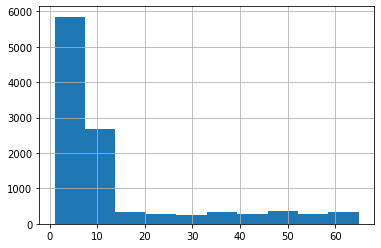

In [23]:
# Verificando Histograma
df.desconto.hist();

In [24]:
# Calcula os limites superior e inferior
# (Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior)

limite_superior = df.desconto.mean() + 3 * df.desconto.std()
print("Limite superior:", limite_superior)

limite_inferior = df.desconto.mean() - 3 * df.desconto.std()
print("Limite inferior:", limite_inferior)

Limite superior: 61.987374075327665
Limite inferior: -35.24228316623676


In [25]:
# Cria e visualiza um novo Dataframe somente com as linhas com valores outliers da variável Desconto
df_outliers_desconto = df[(df.desconto <= limite_inferior) | (df.desconto >= limite_superior)]
df_outliers_desconto

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3005,3006,F,Caminhao,5,2,159,3,media,F,63,1675,1
3017,3018,F,Aviao,4,1,235,2,alta,M,64,2107,1
3040,3041,C,Navio,3,2,149,3,media,F,64,1920,1
3068,3069,A,Navio,4,3,139,3,baixa,M,64,1814,1


#### Removendo Valores Outliers da coluna desconto

In [26]:
# Filtra o dataframe removendo os registros com outliers na coluna desconto
df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [27]:
# Verificando numero de linhas do dataframe
len(df)

10819

### <br>Tratando Todas as Outras Variáveis Numéricas (exceto desconto)

#### Criando um objeto do tipo array para filtrar o dataframe (isto é uma forma de automatizar o processo)

In [28]:
# Criação de um array booleano inicializado com True para todos os registros do dataframe
registros = np.array([True] * len(df))
type(registros)

numpy.ndarray

In [29]:
# Contagem de valores True
np.count_nonzero(registros == True)

10819

In [30]:
# Contagem de valores False
np.count_nonzero(registros == False)

0

In [31]:
# Variáveis numéricas (sem a variável desconto)
nums2 = ['numero_chamadas_cliente', 
         'avaliacao_cliente', 
         'compras_anteriores', 
         'custo_produto', 
         'peso_gramas']

#### Agora vamos veriricar valores outliers através da função stats.zscore()

In [32]:
# Loop através de cada coluna numérica especificada na lista nums2
for col in nums2:
    
    # Calcula o z-score absoluto para cada valor na coluna.
    # O z-score descreve quantos desvios padrões um elemento está distante da média.
    zscore = abs(stats.zscore(df[col]))
    
    # Atualiza o array 'registros' para False para os valores onde o z-score é >= 3.
    # Isso indica que o valor é considerado um outlier.
    registros = (zscore < 3) & registros

In [33]:
# Contagem de valores True após Loop
np.count_nonzero(registros == True)

10643

In [34]:
# Contagem de valores False após Loop
np.count_nonzero(registros == False)

176

In [35]:
# Filtra o dataframe removendo os registros com o z-score abaixo de 3 nas colunas numéricas
df = df[registros] 

In [36]:
print(f'Número de linhas após filtrar valores extremos (outliers): {len(df)}')

Número de linhas após filtrar valores extremos (outliers): 10643


## <br><br><u>Tratamento de Desbalanceamento de Classe</u>

**ATENÇÃO**: Deve ser feito nos dados de treino, após o pré-processamento dos dados e não neste momento.

In [37]:
# Verificando Variável Alvo
df['entregue_no_prazo'].value_counts()

entregue_no_prazo
1    6282
0    4361
Name: count, dtype: int64

# <br><br><u>Feature Selection</u>

**ATENÇÃO**: Aqui tomamos as decisões sobre quais variáveis serão usadas na Engenharia de Atributos.

In [38]:
# Nome Colunas
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [39]:
# Visualizando
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


### <br>Aplicando Feature Selection nas Variáveis Numéricas

#### <br>Visualizando Correlação das Variáveis Numéricas

In [40]:
# Correlação
df[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
numero_chamadas_cliente,1.000000,0.013398,0.246604,-0.132172,0.328148,-0.285186
avaliacao_cliente,0.013398,1.000000,0.004893,0.000551,0.006332,-0.004440
compras_anteriores,0.246604,0.004893,1.000000,-0.106093,0.163395,-0.235066
desconto,-0.132172,0.000551,-0.106093,1.000000,-0.137703,-0.365062
custo_produto,0.328148,0.006332,0.163395,-0.137703,1.000000,-0.146885
peso_gramas,-0.285186,-0.004440,-0.235066,-0.365062,-0.146885,1.000000


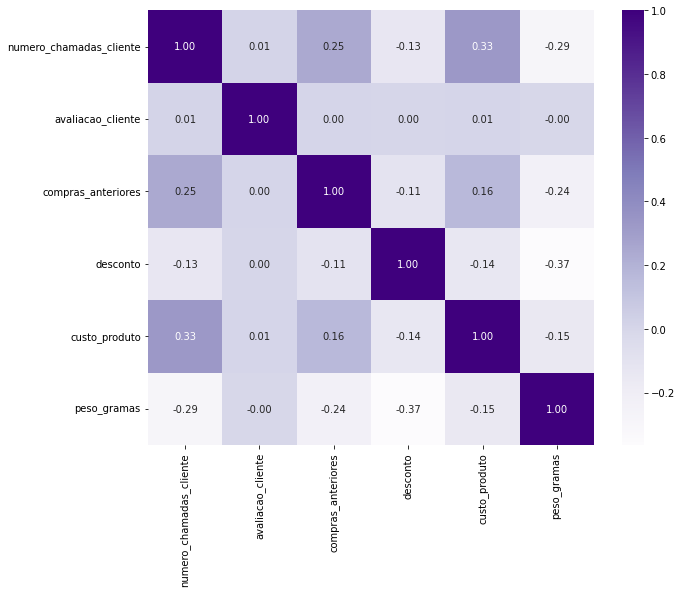

In [41]:
# Mapa de correlação 
plt.figure(figsize = (10, 8))
sns.heatmap(df[nums].corr(), cmap = 'Purples', annot = True, fmt = '.2f');

**Decisão**: Com base na figura acima, foi tomada a **decisão** de que as variáveis que ultrapassaram o limite (+/- 0,05) na correlação com varíavel alvo/target (entregue_no_prazo) serão escolhidos para serem processados na Engenharia de Atributos, nesse caso foram as escolhidas as variáveis: <b>numero_chamadas_cliente, custo_produto, compras_anteriores, desconto e peso_gramas</b>.

A variável <b>avaliacao_cliente</b> não parece relevante e não será processada na Engenharia de Atributos.<br>
A variável <b>ID</b> também será descartada, pois não representa informação útil.

#### É fundamental justificar suas escolhas sempre.

### <br>Aplicando Feature Selection nas Variáveis Categóricas

#### <br>Visualizando Variáveis Categóricas atráves de Gráfico de Barras

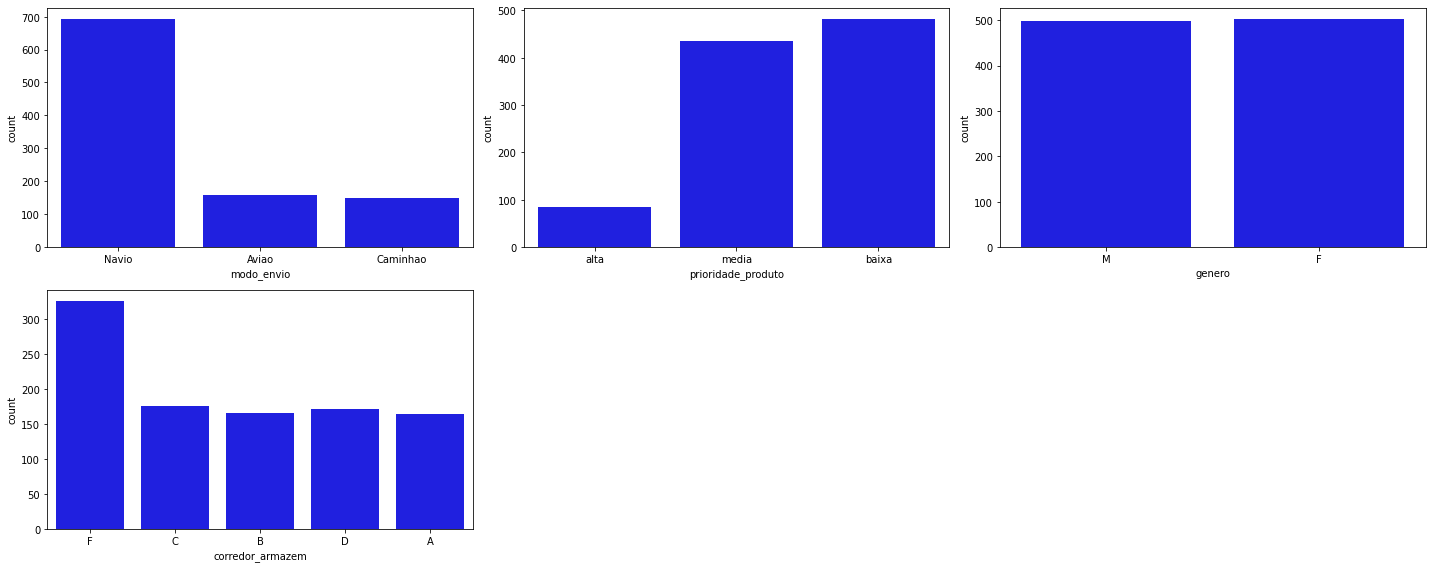

In [42]:
# Gráfico de Barras
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20,8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão**: Na figura acima pode-se ver que todas as variáveis categóricas têm uma diferença bastante grande em termos de contagens das classes, exceto a variável de Gênero. Sendo assim, não vamos considerar a variável genero na Engenharia de Atributos.

### <br><br><br><font color="SteelBlue">Obs: Como as tarefas a seguir são complexas, demonstraremos apenas como algumas colunas. Fique à vontade para refazer a Engenharia de Atributos usando todas as colunas selecionadas conforme regras definidas acima.<br><br></font>

# <br><br><u>Feature Extraction</u>

**ATENÇÃO**: Aqui fazemos a extração de novas variáveis a partir da informação contida em outras variáveis.

In [43]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [44]:
# Cria uma cópia do dataframe
df_eng = df.copy()
df_eng.shape

(10643, 12)

In [45]:
# Verificando o tipo das variáveis
df_eng.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### <br>1- Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance da variável alvo **entregue_no_prazo** por **prioridade_produto** com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [46]:
# Verificando Value Counts
df_eng.prioridade_produto.value_counts()

prioridade_produto
baixa    5174
media    4587
alta      882
Name: count, dtype: int64

#### Criando a nova variável <font color="SteelBlue">performance_prioridade_envio</font>

In [47]:
# Criamos a variável e preenchemos com valores NA
df_eng['performance_prioridade_envio'] = np.nan
df_eng.head(2)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,NaN
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,NaN


#### Alimentando a variável <font color="SteelBlue">performance_prioridade_envio</font>

In [48]:
# Atraso Crítico     : Quando o produto tem alta prioridade e não foi entregue no prazo.
# Atraso Problemático: Quando o produto tem prioridade média e não foi entregue no prazo.
# Atraso Tolerável   : Quando o produto tem baixa prioridade e não foi entregue no prazo.
# Não Houve Atraso   : Para todos os outros casos, indicando que o produto foi entregue no prazo.

df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável", 
    "Não Houve Atraso")))

#### Visualizando o resultado

In [49]:
df_eng['performance_prioridade_envio'].value_counts()

performance_prioridade_envio
Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: count, dtype: int64

In [50]:
df_eng.sample(4)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
9964,9965,C,Navio,6,2,189,2,baixa,F,2,1837,0,Atraso Tolerável
9490,9491,C,Navio,4,1,155,3,media,M,9,4443,0,Atraso Problemático
7869,7870,B,Navio,4,5,240,2,media,M,6,5045,1,Não Houve Atraso
7019,7020,F,Navio,4,4,139,3,media,M,2,5135,0,Atraso Problemático


### <br>Realizando Análise na nova variável <font color="SteelBlue">performance_prioridade_envio</font>
#### Criando um novo dataframe com a análise

In [51]:
# Agrupando os dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [52]:
# Ajustando os nomes das colunas
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [53]:
# Aplicando Pivot ("girando os dados", transformando linhas em colunas e colunas em linhas)
df_report1 = pd.pivot_table(df_report1,
                             index = 'performance_prioridade_envio',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report1

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [54]:
# Novo ajuste nos nomes das colunas
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [55]:
# Replace (substituindo) todo valor nan por zero (para assim poder concatenar com operação as colunas abaixo)
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)
df_report1

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [56]:
# Concatena colunas "Total Atraso" e "Total no Prazo" e criando uma terceira coluna "Total"
df_report1["Total"] = df_report1["Total Atraso"] + df_report1["Total no Prazo"]
df_report1

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico,310.0,0.0,310.0
1,Atraso Problemático,1917.0,0.0,1917.0
2,Atraso Tolerável,2134.0,0.0,2134.0
3,Não Houve Atraso,0.0,6282.0,6282.0


In [57]:
# Removendo Colunas "Total Atraso" e "Total no Prazo"
df_report1.drop(df_report1.columns[[1, 2]], axis = 1, inplace = True)
df_report1

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


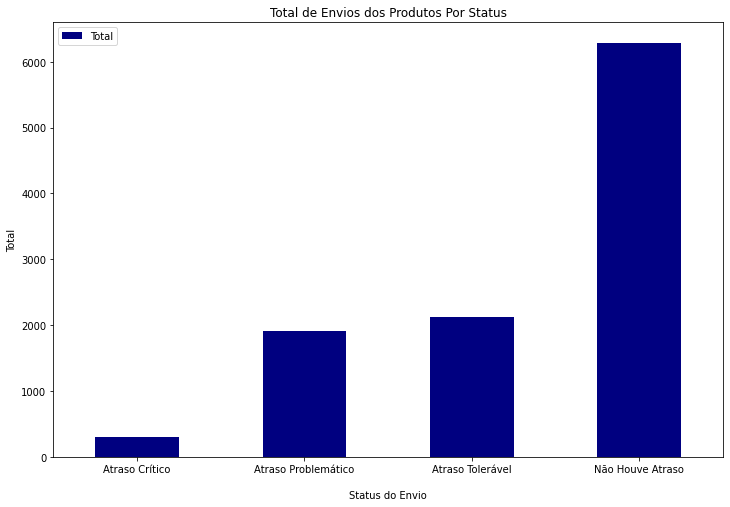

In [58]:
# Plot (Gráfico de Barras)
df_report1.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'jet',
                figsize=(12,8))
plt.xticks(rotation = 0)
plt.show()

### <br>2- Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio

O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance da variável alvo **entregue_no_prazo** por **modo_envio** e **prioridade_poduto** com base nas seguintes regras de negócio:


- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é crítico por Navio.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é problemático por Navio.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é tolerável por Navio.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é crítico por Aviao.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é problemático por Aviao.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é tolerável por Aviao.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é crítico por Caminhao.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é problemático por Caminhao.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é tolerável por Caminhao.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [65]:
# Visualizando
df_eng

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0,Atraso Problemático
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0,Atraso Tolerável
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0,Atraso Problemático
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0,Atraso Tolerável


In [66]:
# Verificando Value Counts
df_eng.prioridade_produto.value_counts()

prioridade_produto
baixa    5174
media    4587
alta      882
Name: count, dtype: int64

In [62]:
# Verificando Value Counts
df_eng.modo_envio.value_counts()

modo_envio
Navio       7212
Aviao       1728
Caminhao    1703
Name: count, dtype: int64

#### Criando a nova variável <font color="SteelBlue">performance_modo_envio</font>

In [67]:
# Criamos a variável e preenchemos com valores NA
df_eng['performance_modo_envio'] = np.nan
df_eng.head(2)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso,NaN
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso,NaN


#### Alimentando a variável <font color="SteelBlue">performance_modo_envio</font>

In [68]:
# Lógica
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Navio",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Aviao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Caminhao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Caminhao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Caminhao", 
    "Não Houve Atraso")))))))))

#### Visualizando o resultado

In [69]:
# Visualizando
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
6663,6664,B,Navio,2,1,143,3,baixa,M,4,4512,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio
1368,1369,D,Aviao,4,3,247,4,baixa,F,19,3838,1,Não Houve Atraso,Não Houve Atraso
4010,4011,A,Navio,2,5,154,3,media,F,1,4377,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio
9259,9260,F,Navio,5,4,136,3,media,M,4,5413,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio
70,71,C,Navio,5,1,187,4,alta,M,14,3849,1,Não Houve Atraso,Não Houve Atraso


In [70]:
# Verificando Value Counts
df_eng.performance_modo_envio.value_counts()

performance_modo_envio
Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: count, dtype: int64

### <br>Realizando Análise na nova variável <font color="SteelBlue">performance_modo_envio</font>
#### Criando um novo dataframe com a análise

In [71]:
# Agrupamos os dados para análise
df_report2 = df_eng.groupby(['performance_modo_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453


In [72]:
# Renomeando as colunas
df_report2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453
9,Não Houve Atraso,1,6282


In [ ]:
# Aplicando Pivot ("girando os dados", transformando linhas em colunas e colunas em linhas)
df_report2 = pd.pivot_table(df_report2,
                            index = 'performance_modo_envio',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report2.head(10)